<a href="https://colab.research.google.com/github/sebasatarama/App_WithOutStress/blob/main/Trabajo_finalAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [41]:
ds = pd.read_csv('DEvideos_cc50.csv')

#Agregamos los nombres de la categoría como nueva columna al data set

In [42]:
titulos_categorias = []
id_categorias = []
with open('US_category_id.json') as file:
  data = json.load(file)

  for t in data['items']:
    id_categorias.append(t['id'])
    titulos_categorias.append(t['snippet']['title'])

In [43]:
for i in range(len(id_categorias)):
  id_categorias[i] = int(id_categorias[i])

In [44]:
dic = dict(zip(id_categorias, titulos_categorias))

In [45]:
titulos=[]
for i in range(len(ds)):
  titulos.append(dic[ds['category_id'][i]])

In [46]:
ds['category_title'] = titulos

In [47]:
ds.head()

video_id trending_date  \
0  LgVi6y5QIjM      17.14.11   
1  Bayt7uQith4      17.14.11   
2  1ZAPwfrtAFY      17.14.11   
3  AHtypnRk7JE      17.14.11   
4  ZJ9We4bjcg0      17.14.11   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id              publish_time  \
0           24  2017-11-13T17:08:49.000Z   
1           23  2017-11-12T22:30:01.000Z   
2           24  2017-11-13T07:30:00.000Z   
3           27  2017-11-12T15:00:01.000Z   
4           24  2017-11-12T13:10:36.000Z   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1  Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2  last week tonight trump presidency|"last week ...  2418783   97190   
3  Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4  kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   

   dislikes  ...                                  thumbnail_link  \
0       230  ...  https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg   
1       302  ...  https://i.ytimg.com/vi/Bayt7uQith4/default.jpg   
2      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
3       458  ...  https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg   
4      2467  ...  https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description                state  \
0  Heute gibt es mal wieder ein neues Format... w...   Schleswig Holstein   
1  Kinder ferngesteuert! Kinder lassen sich sooo ...  Nordrhein Westfalen   
2  One year after the presidential election, John...             Saarland   
3  ►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...               Bayern   
4  18 Song Mashup über den (veränderten) Beat von...               Berlin   

         lat        lon                               geometry category_title  
0  54.783748   9.433315        POINT (9.433315388 54.78374778)  Entertainment  
1  52.029988   8.530011  POINT (8.530011351000001 52.02998822)         Comedy  
2  49.250390   6.970003        POINT (6.970003213 49.25039044)  Entertainment  
3  50.266607  10.966607        POINT (10.96660681 50.26660748)      Education  
4  52.521819  13.401549        POINT (13.40154862 52.52181866)  Entertainment  

[5 rows x 21 columns]

Vemos cuantos valores faltantes tiene el dataset

In [12]:
ds.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
category_title               0
dtype: int64

Llenamos la descripción con el video_id y el título de la categoría

In [13]:
ds['description'].fillna('Video_id:' + ds['video_id'] +' Category: ' + ds['category_title'], inplace = True)

In [14]:
ds.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
category_title            0
dtype: int64

Se observa que se cuenta con valores atípicos en estas 4 columnas del dataset

In [48]:
px.box(x=[ds['likes'], ds['dislikes'], ds['views'], ds['comment_count']])

Creamos una función que encuentra los valores atípicos y los cambia por la media

In [36]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       int(df.mean()),
       np.where(
           df < lower,
           int(df.mean()), #Deben ser números enteros
           df
           )
       )
   return df

In [37]:
ds['likes'] = impute_outliers_IQR(ds['likes'])
ds['dislikes'] = impute_outliers_IQR(ds['dislikes'])
ds['views'] = impute_outliers_IQR(ds['views'])
ds['comment_count'] = impute_outliers_IQR(ds['comment_count'])

In [34]:
import plotly.express as px

In [38]:
ds['dislikes'].describe()

count    40840.000000
mean       202.493827
std        201.675596
min          0.000000
25%         29.000000
50%        134.000000
75%        376.099011
max        896.000000
Name: dislikes, dtype: float64

In [39]:
ds['comment_count'].describe()

count    40840.000000
mean       867.686938
std       1011.624893
min          0.000000
25%         79.000000
50%        376.000000
75%       1376.000000
max       3320.000000
Name: comment_count, dtype: float64

Box plot donde se observa que los valores atípicos han desaparecido

In [40]:
px.box(x=[ds['likes'], ds['dislikes'], ds['views'], ds['comment_count']])

In [49]:
"""
Para la realización de ciertas preguntas de esta sección se hará uso de
un nuevo dataframe creado a partir del ya existente.
"""

'\nPara la realización de ciertas preguntas de esta sección se hará uso de\nun nuevo dataframe creado a partir del ya existente.\n'

#Preguntas por categoría de Videos

##Pregunta 1: ¿Qué categorías de videos son las de mayor tendencia?


In [50]:
import seaborn as sns

Respuesta:
Se puede observar, gracias al grafico de barras horizontal, que la categoría Entertainment fue la que más estuvo en trending.

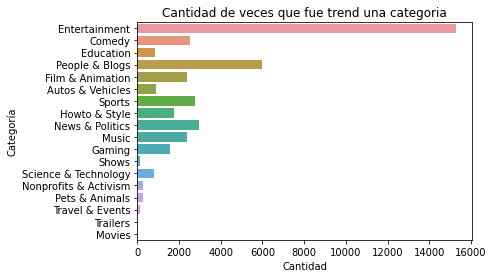

In [51]:
ax = sns.countplot(y = 'category_title', data = ds)
ax.set(ylabel = 'Categoría', xlabel='Cantidad', title='Cantidad de veces que fue trend una categoria')
plt.show()

Cantidades exactas

In [52]:
#La función value_counts, integrada en pandas, nos muestra una lista detallada
#y ordenada de forma descendente
ds['category_title'].value_counts()

Entertainment            15292
People & Blogs            5988
News & Politics           2935
Sports                    2752
Comedy                    2534
Film & Animation          2376
Music                     2372
Howto & Style             1745
Gaming                    1565
Autos & Vehicles           873
Education                  844
Science & Technology       806
Nonprofits & Activism      256
Pets & Animals             251
Travel & Events            141
Shows                      107
Movies                       2
Trailers                     1
Name: category_title, dtype: int64

##Pregunta 2:¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [53]:
titulos_gb = ds.groupby('category_title')

In [54]:
titulos = ds['category_title'].unique()

In [55]:
#ordenamos alfabeticamente
titulos=np.sort(titulos)

In [56]:
#Estos dos array ya se guardan ordenados alfabeticamente.
likes = titulos_gb.sum()['likes'].unique()
dislikes = titulos_gb.sum()['dislikes'].unique()

In [57]:
ld = pd.DataFrame()

In [58]:
#Ordenamos todo en un nuevo dataframe, para facilitar el calculo
ld['category_title'] = titulos
ld['likes'] = likes
ld['dislikes'] = dislikes

La tabla muestra cantidad de likes y dislikes por categoría

In [59]:
ld

category_title      likes  dislikes
0        Autos & Vehicles    6143363    182704
1                  Comedy   74787405   2557861
2               Education    7516778    234168
3           Entertainment  267752272  22485534
4        Film & Animation   45315546   1864876
5                  Gaming   28868280   1984458
6           Howto & Style   15101881    739287
7                  Movies      63834      2594
8                   Music  300297066  12985188
9         News & Politics   14391904   2369587
10  Nonprofits & Activism   14600953   4006492
11         People & Blogs   60920058   4544157
12         Pets & Animals    3351052     81919
13   Science & Technology   15372868    737165
14                  Shows     378819     98783
15                 Sports   37646423   2153755
16               Trailers          0         0
17        Travel & Events     887036     30503

###Gráficos

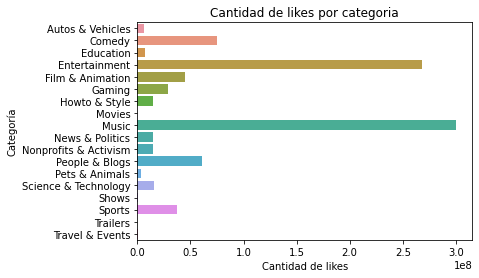

In [60]:
#La cantidad de likes se debe multiplicar por 10^8 en el gráfico (se puede
#observar abajo a la derecha)
ax = sns.barplot(y = 'category_title', x='likes', data = ld)
ax.set(ylabel = 'Categoría', xlabel='Cantidad de likes', title='Cantidad de likes por categoria')
plt.show()

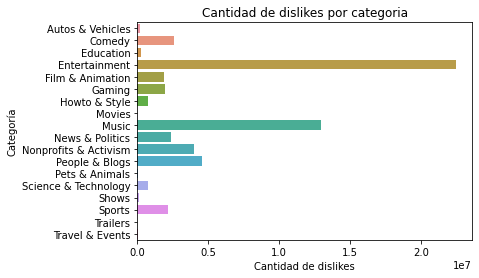

In [61]:
#La cantidad de dislikes se debe multiplicar por 10^7 en el gráfico (se puede
#observar abajo a la derecha)
ax = sns.barplot(y = 'category_title', x='dislikes', data = ld)
ax.set(ylabel = 'Categoría', xlabel='Cantidad de dislikes', title='Cantidad de dislikes por categoria')
plt.show()

##Pregunta 3: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [62]:
ld['ratio_like_dislike'] = ld['likes']/ld['dislikes']

In [63]:
ld.fillna(0, inplace=True)

In [64]:
#Tabla que muestra el ratio de cada categoría
ld

category_title      likes  dislikes  ratio_like_dislike
0        Autos & Vehicles    6143363    182704           33.624677
1                  Comedy   74787405   2557861           29.238260
2               Education    7516778    234168           32.099937
3           Entertainment  267752272  22485534           11.907757
4        Film & Animation   45315546   1864876           24.299496
5                  Gaming   28868280   1984458           14.547186
6           Howto & Style   15101881    739287           20.427630
7                  Movies      63834      2594           24.608327
8                   Music  300297066  12985188           23.126124
9         News & Politics   14391904   2369587            6.073592
10  Nonprofits & Activism   14600953   4006492            3.644324
11         People & Blogs   60920058   4544157           13.406240
12         Pets & Animals    3351052     81919           40.906896
13   Science & Technology   15372868    737165           20.854039
14                  Shows     378819     98783            3.834860
15                 Sports   37646423   2153755           17.479436
16               Trailers          0         0            0.000000
17        Travel & Events     887036     30503           29.080287

Gráfico

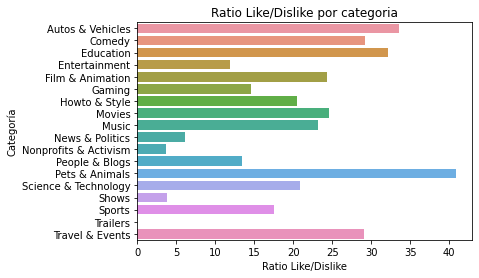

In [65]:
ax = sns.barplot(y = 'category_title', x='ratio_like_dislike', data = ld)
ax.set(ylabel = 'Categoría', xlabel='Ratio Like/Dislike', title='Ratio Like/Dislike por categoria')
plt.show()

##Pregunta 4: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [66]:
#Agregamos las nuevas columnas necesarias
ld['comment_count'] = titulos_gb.sum()['comment_count'].unique()
ld['views'] = titulos_gb.sum()['views'].unique()

In [67]:
ld['ratio_view_comment'] = ld['views']/ld['comment_count']

In [68]:
ld

category_title      likes  dislikes  ratio_like_dislike  \
0        Autos & Vehicles    6143363    182704           33.624677   
1                  Comedy   74787405   2557861           29.238260   
2               Education    7516778    234168           32.099937   
3           Entertainment  267752272  22485534           11.907757   
4        Film & Animation   45315546   1864876           24.299496   
5                  Gaming   28868280   1984458           14.547186   
6           Howto & Style   15101881    739287           20.427630   
7                  Movies      63834      2594           24.608327   
8                   Music  300297066  12985188           23.126124   
9         News & Politics   14391904   2369587            6.073592   
10  Nonprofits & Activism   14600953   4006492            3.644324   
11         People & Blogs   60920058   4544157           13.406240   
12         Pets & Animals    3351052     81919           40.906896   
13   Science & Technology   15372868    737165           20.854039   
14                  Shows     378819     98783            3.834860   
15                 Sports   37646423   2153755           17.479436   
16               Trailers          0         0            0.000000   
17        Travel & Events     887036     30503           29.080287   

    comment_count       views  ratio_view_comment  
0          657163   182112183          277.118741  
1         8851969  1642158154          185.513320  
2          888078   143868522          161.999872  
3        36487217  8102638694          222.067874  
4         5387311  1757184336          326.170948  
5         4703845   669356053          142.299768  
6         1783048   589323375          330.514588  
7            3249     3071004          945.215143  
8        29621836  5683870646          191.881106  
9         4096468   845937888          206.504210  
10        3880721   159162128           41.013546  
11        8919200  2193613268          245.942828  
12         660838    92098930          139.366880  
13        3442888   572461153          166.273533  
14          67392    50844117          754.453303  
15        4220385  1938192278          459.245372  
16              0        8804                 inf  
17         102772    19213672          186.954346

Gráfico

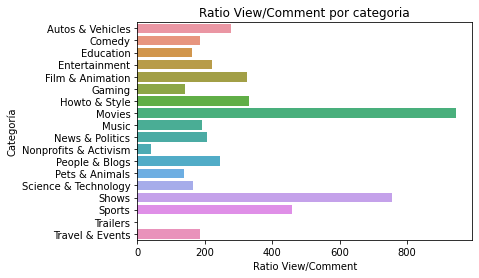

In [69]:
ax = sns.barplot(y = 'category_title', x='ratio_view_comment', data = ld)
ax.set(ylabel = 'Categoría', xlabel='Ratio View/Comment', title='Ratio View/Comment por categoria')
plt.show()

#Preguntas por el tiempo transcurrido

##Pregunta 5: ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

In [70]:
#Cambiando los formatos de las fechas
ds['trending_date'] = pd.to_datetime(ds['trending_date'], format='%y.%d.%m')
ds['publish_time'] = pd.to_datetime(ds['publish_time'], infer_datetime_format=True)

In [71]:
ds.head()

video_id trending_date  \
0  LgVi6y5QIjM    2017-11-14   
1  Bayt7uQith4    2017-11-14   
2  1ZAPwfrtAFY    2017-11-14   
3  AHtypnRk7JE    2017-11-14   
4  ZJ9We4bjcg0    2017-11-14   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id              publish_time  \
0           24 2017-11-13 17:08:49+00:00   
1           23 2017-11-12 22:30:01+00:00   
2           24 2017-11-13 07:30:00+00:00   
3           27 2017-11-12 15:00:01+00:00   
4           24 2017-11-12 13:10:36+00:00   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1  Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2  last week tonight trump presidency|"last week ...  2418783   97190   
3  Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4  kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   

   dislikes  ...                                  thumbnail_link  \
0       230  ...  https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg   
1       302  ...  https://i.ytimg.com/vi/Bayt7uQith4/default.jpg   
2      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
3       458  ...  https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg   
4      2467  ...  https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description                state  \
0  Heute gibt es mal wieder ein neues Format... w...   Schleswig Holstein   
1  Kinder ferngesteuert! Kinder lassen sich sooo ...  Nordrhein Westfalen   
2  One year after the presidential election, John...             Saarland   
3  ►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...               Bayern   
4  18 Song Mashup über den (veränderten) Beat von...               Berlin   

         lat        lon                               geometry category_title  
0  54.783748   9.433315        POINT (9.433315388 54.78374778)  Entertainment  
1  52.029988   8.530011  POINT (8.530011351000001 52.02998822)         Comedy  
2  49.250390   6.970003        POINT (6.970003213 49.25039044)  Entertainment  
3  50.266607  10.966607        POINT (10.96660681 50.26660748)      Education  
4  52.521819  13.401549        POINT (13.40154862 52.52181866)  Entertainment  

[5 rows x 21 columns]

Gráfico

In [74]:
date_gb = ds.groupby('trending_date')

In [77]:
date_gb['title'].count()

trending_date
2017-11-14    200
2017-11-15    200
2017-11-16    199
2017-11-17    200
2017-11-18    200
             ... 
2018-06-10    177
2018-06-11    197
2018-06-12    199
2018-06-13    193
2018-06-14    200
Name: title, Length: 205, dtype: int64

<function matplotlib.pyplot.show>

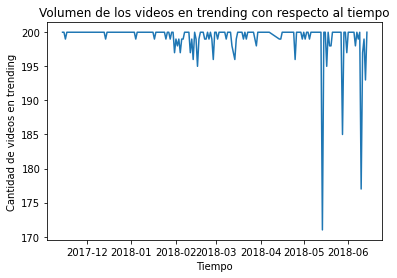

In [78]:
ax =sns.lineplot(x = ds['trending_date'].unique(),  y = np.array(date_gb.count()['category_title']))
ax.set(ylabel='Cantidad de videos en trending', xlabel="Tiempo", title = 'Volumen de los videos en trending con respecto al tiempo')
plt.show

#Preguntas por Canales de Youtube

##Pregunta 6: ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

Se puede observar en la tabla que Galileo es el canal con mas frecuencia en tendencias. Además se sabe que hay muchos canales que solo aparecieron una vez

In [79]:
channel_gb = ds.groupby('channel_title')

In [80]:
channel_count = np.array(channel_gb.count()['video_id'])

In [81]:
canales = np.sort(ds['channel_title'].unique())

In [82]:
channel_count, canales = map(list, zip(*sorted(zip(channel_count, canales))))

In [83]:
ds['channel_title'].value_counts()

Galileo                                  200
Ruhrpottwache                            185
Анатолий Шарий                           182
Çukur                                    180
Auf Streife                              180
                                        ... 
BroSep Fitness                             1
Kevkowich - Attack on Titan und Mehr!      1
Geil also finde ich                        1
MürderBeatzTV                              1
DailyProFootball                           1
Name: channel_title, Length: 6085, dtype: int64

Debido a que son mas de 6000 canales diferentes, en la gráfica solo se mostraran los 5 primeros y los 5 últimos

In [84]:
grafic_channel = []
grafic_count = []
for i in range(5):
  grafic_channel.append(canales[i])
  grafic_channel.append(canales[len(canales)-i-1])
  grafic_count.append(channel_count[i])
  grafic_count.append(channel_count[len(channel_count)-i-1])

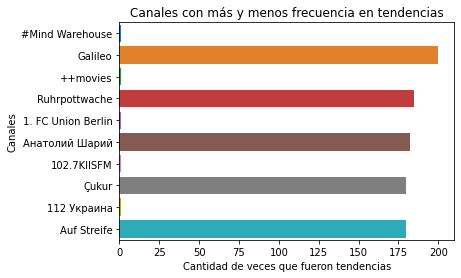

In [85]:
ax = sns.barplot(y = grafic_channel, x=grafic_count)
ax.set(ylabel = 'Canales', xlabel = 'Cantidad de veces que fueron tendencias', title = 'Canales con más y menos frecuencia en tendencias')
plt.show()

#Preguntas por geografía del País

In [86]:
state_gb = ds.groupby('state')

In [87]:
_, lat =   map(list, zip(*sorted(zip(np.array(ds['state'].unique()), np.array(ds['lat'].unique())))))
_ ,lon = map(list, zip(*sorted(zip(np.array(ds['state'].unique()), np.array(ds['lon'].unique())))))

In [88]:
state_df = pd.DataFrame()

In [89]:
state_df['state'] = np.sort(ds['state'].unique())
state_df['views'] = np.array(state_gb.sum()['views'])
state_df['likes'] = np.array(state_gb.sum()['likes'])
state_df['dislikes'] = np.array(state_gb.sum()['dislikes'])
state_df['lat']=lat
state_df['lon']=lon

In [90]:
state_df

state       views     likes  dislikes        lat  \
0        Baden Wurttemberg  1542170061  53931077   2926202  48.999992   
1                   Bayern  1456903369  56428535   2952057  50.266607   
2                   Berlin  1535553735  60643112   3329344  52.521819   
3              Brandenburg  1416692239  48026671   3110545  51.770418   
4                   Bremen  1556155587  61946034   3852057  53.550438   
5                  Hamburg  1783092057  66910220   4738807  53.550025   
6                   Hessen  1667128104  60710403   3947336  51.300007   
7   Mecklenburg Vorpommern  1311564024  43428763   2990948  53.633304   
8            Niedersachsen  1479583990  54795154   3146103  53.129999   
9      Nordrhein Westfalen  1573548930  57393466   3105419  52.029988   
10         Rheinland Pfalz  1671164998  58850488   3473871  49.982472   
11                Saarland  1291984793  46948728   2646017  49.250390   
12                 Sachsen  1544022118  50669975   3329905  50.829984   
13          Sachsen Anhalt  1493986515  53964695   3748187  52.130421   
14      Schleswig Holstein  1622083319  59003927   4753612  54.783748   
15               Thuringen  1699481366  59744290   5008621  50.970053   

          lon  
0    8.399993  
1   10.966607  
2   13.401549  
3   14.329967  
4    8.579982  
5    9.999999  
6    9.500030  
7   11.416699  
8    8.220004  
9    8.530011  
10   8.273219  
11   6.970003  
12  12.919976  
13  11.620004  
14   9.433315  
15  11.029962

Mapa de views por Región

In [91]:
fig = px.scatter_mapbox(
    state_df, 
    lat='lat',
    lon='lon',
    color='views',
    color_continuous_scale='Inferno',
    hover_name='state',
    zoom=2,
    size="views",
    size_max=15,
    mapbox_style='carto-positron',
    title='Views de videos según regiones en Alemania',
)
fig.show()

Mapa de likes por región

In [92]:
fig = px.scatter_mapbox(
    state_df, 
    lat='lat',
    lon='lon',
    color='likes',
    color_continuous_scale='Inferno',
    hover_name='state',
    zoom=2,
    size="likes",
    size_max=15,
    mapbox_style='carto-positron',
    title='Likes de videos según regiones en Alemania',
)
fig.show()

Mapa dislikes por región

In [93]:
fig = px.scatter_mapbox(
    state_df, 
    lat='lat',
    lon='lon',
    color='dislikes',
    color_continuous_scale='Inferno',
    hover_name='state',
    zoom=2,
    size="dislikes",
    size_max=15,
    mapbox_style='carto-positron',
    title='Dislikes de videos según regiones en Alemania',
)
fig.show()

Guardamos y descargamos el dataset final

In [94]:
from google.colab import files

In [95]:
ds.to_csv('DEvideos_cc50_final.csv') 
files.download('DEvideos_cc50_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>